In [1]:
%matplotlib inline

In [2]:
# Install necessary modules.
# 必要なモジュールのインストール
!pip install rawpy
!pip install imageio

In [3]:
# Module import setting. May not be needed on Colab.
# モジュールのインポート設定。Colabでは必要ないかもしれない。
import os
import sys
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)

In [4]:
!wget https://raw.githubusercontent.com/moizumi99/raw_process/master/raw_process.py

--2018-11-25 16:08:26--  https://raw.githubusercontent.com/moizumi99/raw_process/master/raw_process.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.188.133
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.188.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 4916 (4.8K) [text/plain]
Saving to: ‘raw_process.py.2’

raw_process.py.2    100%[===================>]   4.80K  --.-KB/s    in 0s      

2018-11-25 16:08:26 (13.4 MB/s) - ‘raw_process.py.2’ saved [4916/4916]



In [5]:
import raw_process

In [6]:
# Download a sample file
# サンプルファイルのダウンロード
!wget "https://github.com/moizumi99/raw_process/raw/master/sample.ARW"

--2018-11-25 16:08:26--  https://github.com/moizumi99/raw_process/raw/master/sample.ARW
Resolving github.com (github.com)... 192.30.255.113, 192.30.255.112
Connecting to github.com (github.com)|192.30.255.113|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/moizumi99/raw_process/master/sample.ARW [following]
--2018-11-25 16:08:27--  https://raw.githubusercontent.com/moizumi99/raw_process/master/sample.ARW
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.188.133
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.188.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 24746752 (24M) [application/octet-stream]
Saving to: ‘sample.ARW.1’

sample.ARW.1        100%[===================>]  23.60M  51.0MB/s    in 0.5s    

2018-11-25 16:08:27 (51.0 MB/s) - ‘sample.ARW.1’ saved [24746752/24746752]



In [7]:
# RAW File reading with a module (raw_process.py)
# モジュールを理容師たRAW画像ファイルの読み込み
raw = raw_process.read("sample.ARW")

In [8]:
# RAW processing
# RAW　画像処理
color_matrix = [1141, -205, 88, -52, 1229, -154, 70, -225, 1179]
raw_array = raw_process.get_raw_array(raw)
blc_raw = raw_process.black_level_correction(raw, raw_array)
dms_img = raw_process.preview_demosaic(raw, blc_raw)
img_wb = raw_process.white_balance(raw, dms_img)
img_ccm = raw_process.color_correction_matrix(img_wb, color_matrix)
rgb_image = raw_process.gamma_correction(img_ccm)

In [9]:
# Write the RGB to a PNG file.
# PNG画像ファイルとして書き出し。
raw_process.write(rgb_image, "output2.png")

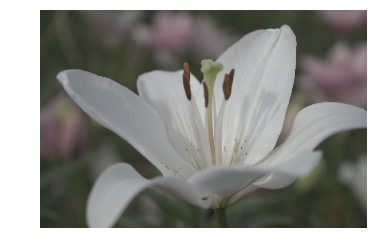

In [10]:
# Show the image.
# 画像を表示して確認
import imageio
from pylab import imshow, show
from matplotlib import pyplot as plt
imshow(imageio.imread('output2.png'))
plt.axis('off')
plt.show()